In [13]:
import pandas as pd
import numpy as np
import sqlalchemy
import json
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, ForeignKey
from sqlalchemy.orm import sessionmaker, relationship

from flask import Flask, jsonify, render_template
from flask_sqlalchemy import SQLAlchemy

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
#from sklearn.metrics import log_lossb
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import numpy as np


In [14]:
hdtable = pd.read_csv("info\hdtable.csv")

In [15]:
hdtable.head()

,ROOMS,YR_RMDL,CENSUS_TRACT,SQUARE,ZIPCODE,BEDRM,BATHRM,KITCHENS,PRICE
0,10,2016.0,5201.0,208,20009.0,4,3,2.0,1700000.0
1,11,2014.0,4201.0,176,20009.0,3,2,2.0,1363000.0
2,11,2000.0,5500.0,92,20009.0,6,4,2.0,1844970.0
3,11,1935.0,5500.0,93,20009.0,5,3,2.0,1625000.0
4,8,2015.0,4201.0,152,20009.0,5,2,2.0,1925000.0


In [16]:
X = hdtable[['ROOMS','YR_RMDL','CENSUS_TRACT', 'SQUARE','ZIPCODE',"BEDRM", "BATHRM", 'KITCHENS']]
y = hdtable["PRICE"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3205, 8) (3205, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.431733965505861
Testing Score: 0.5746154525940055


Text(0.5, 1.0, 'Residual Plot')

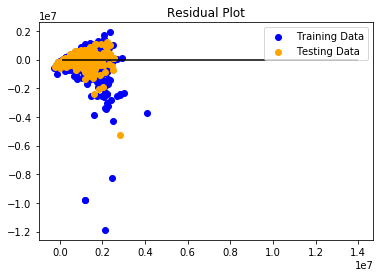

In [12]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")